<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#README" data-toc-modified-id="README-1">README</a></span></li><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-2">Import modules</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3">Import data</a></span></li><li><span><a href="#Get-variant-count" data-toc-modified-id="Get-variant-count-4">Get variant count</a></span><ul class="toc-item"><li><span><a href="#Get-variant-count-by-AF-for-a-release" data-toc-modified-id="Get-variant-count-by-AF-for-a-release-4.1">Get variant count by AF for a release</a></span></li><li><span><a href="#Get-variant-count-by-AF-for-coding-variants" data-toc-modified-id="Get-variant-count-by-AF-for-coding-variants-4.2">Get variant count by AF for coding variants</a></span></li><li><span><a href="#Get-variant-count-by-VEP-consequence" data-toc-modified-id="Get-variant-count-by-VEP-consequence-4.3">Get variant count by VEP consequence</a></span></li><li><span><a href="#Get-variant-count-by-AF-for-a-gene" data-toc-modified-id="Get-variant-count-by-AF-for-a-gene-4.4">Get variant count by AF for a gene</a></span><ul class="toc-item"><li><span><a href="#On-region-view-(the-interval-of-a-gene)" data-toc-modified-id="On-region-view-(the-interval-of-a-gene)-4.4.1">On region view (the interval of a gene)</a></span></li><li><span><a href="#On-gene-page" data-toc-modified-id="On-gene-page-4.4.2">On gene page</a></span></li></ul></li></ul></li><li><span><a href="#Filter-to-variants-by-VEP-annotations" data-toc-modified-id="Filter-to-variants-by-VEP-annotations-5">Filter to variants by VEP annotations</a></span><ul class="toc-item"><li><span><a href="#Filter-to-'HC'-LOF-variants-for-certain-genes" data-toc-modified-id="Filter-to-'HC'-LOF-variants-for-certain-genes-5.1">Filter to 'HC' LOF variants for certain genes</a></span><ul class="toc-item"><li><span><a href="#Filter-to-pLOF-variants-that-we-used-to-compute-constraint-metrics" data-toc-modified-id="Filter-to-pLOF-variants-that-we-used-to-compute-constraint-metrics-5.1.1">Filter to pLOF variants that we used to compute constraint metrics</a></span></li></ul></li></ul></li><li><span><a href="#Get-'freq'-for-specific-genetic-ancestry-groups" data-toc-modified-id="Get-'freq'-for-specific-genetic-ancestry-groups-6">Get 'freq' for specific genetic ancestry groups</a></span><ul class="toc-item"><li><span><a href="#Get-'freq'-for-multiple-groups-for-an-(gene)-interval" data-toc-modified-id="Get-'freq'-for-multiple-groups-for-an-(gene)-interval-6.1">Get 'freq' for multiple groups for an (gene) interval</a></span></li><li><span><a href="#Get-'freq'-for-a-specific-group-and-a-specific-variant" data-toc-modified-id="Get-'freq'-for-a-specific-group-and-a-specific-variant-6.2">Get 'freq' for a specific group and a specific variant</a></span></li></ul></li></ul></div>

# README

This toolbox is meant to use Hail tables of gnomAD releases on cloud computing, if you want to query variants for gene(s), you should use gnomAD API (https://gnomad.broadinstitute.org/api).

If you want to import your own data to use other gnomAD notebooks, such as for ancestry inference (https://github.com/broadinstitute/gnomad_qc/blob/main/gnomad_qc/example_notebooks/ancestry_classification_using_gnomad_rf.ipynb), you may use Hail's `import_vcf` functions.

In [1]:
import hail as hl

hl.init(
        log="/test_toolbox.log",
        tmp_dir="gs://gnomad-tmp-30day",
    )

Loading BokehJS ...

/opt/conda/miniconda3/lib/python3.11/site-packages/hailtop/aiocloud/aiogoogle/user_config.py:43: UserWarning:

Reading spark-defaults.conf to determine GCS requester pays configuration. This is deprecated. Please use `hailctl config set gcs_requester_pays/project` and `hailctl config set gcs_requester_pays/buckets`.

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


SPARKMONITOR_LISTENER: Started SparkListener for Jupyter Notebook
SPARKMONITOR_LISTENER: Port obtained from environment: 51311
SPARKMONITOR_LISTENER: Application Started: application_1730470703538_0002 ...Start Time: 1730485367380


Running on Apache Spark version 3.5.0
SparkUI available at http://qh1-m.c.broad-mpg-gnomad.internal:39033
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.133-4c60fddb171a
LOGGING: writing to /test_toolbox.log


# Import modules

In [3]:
from gnomad_toolbox.modules.filter_variant import get_variant_count, filter_by_interval, filter_by_gene_symbol, filter_by_csqs
from gnomad_toolbox.modules.import_data import get_ht_by_datatype_and_version
from gnomad_toolbox.modules.filter_variant import 
from gnomad_toolbox.modules.extract_freq import extract_callstats_for_1anc_1variant, extract_callstats_for_multiple_ancs
from gnomad.resources.grch38.gnomad import coverage

# Import data

You can choose which version of gnomAD release you want to look at, here we listed the available version per data type per reference build. 

Available versions for each data type are (as of 2024-10-29):

| Data Type       | GRCh38 Versions                  | GRCh37 Versions      |
|-----------------|----------------------------------|----------------------|
| exomes          | 4.0, 4.1                         | 2.1, 2.1.1           |
| genomes         | 3.0, 3.1, 3.1.1, 3.1.2, 4.0, 4.1 | 2.1, 2.1.1           |
| joint           | 4.1                              | N/A                  |

We use gnomAD v4.1 exomes to demonstrate for examples below. 

In [30]:
ht = get_ht_by_datatype_and_version(data_type='exomes', version='4.1')

# Get variant count

## Get variant count by AF for a release

**Note: this will take long if your notebook is NOT using multiple nodes.**

In [12]:
print(get_variant_count(ht))

{'number of variants with AF < 0.01': 68398090, 'number of variants with AF < 0.001': 67709028}


In [13]:
print(get_variant_count(ht, singletons=True, doubletons=True))

{'number of singletons': 34047562, 'number of doubletons': 10161819, 'number of variants with AF < 0.01': 68398090, 'number of variants with AF < 0.001': 67709028}


## Get variant count by AF for coding variants

In [44]:
ht = get_ht_by_datatype_and_version(data_type='exomes', version='4.1')

ht = filter_by_csqs(ht, ['coding'])

print(get_variant_count(ht, afs=[0.01, 0.001, 0.0005]))

{'number of variants with AF < 0.01': 23762097, 'number of variants with AF < 0.001': 23643787, 'number of variants with AF < 0.0005': 23569893}


## Get variant count by VEP consequence

In [20]:
# total number of missense variant in exomes data
ht = get_ht_by_datatype_and_version(data_type='exomes', version='4.1')

ht.filter(
    hl.any(
        hl.map(
            lambda x: (x.consequence_terms.contains("missense_variant")),
            ht.vep.transcript_consequences,
        )
    )
).count()

18231426

## Get variant count by AF for a gene

**Note: This isn't necessarily equal to the number of variants annotated to this gene by VEP.**

Here we show two ways that you can load a variant table on the gnomAD browser, one is the [gene page](https://gnomad.broadinstitute.org/gene/ENSG00000149295?dataset=gnomad_r4) (filtered to MANE Select transcript of that gene, and only variants located in or within 75 base pairs of a coding exon (CDS)), the other is the [region view](https://gnomad.broadinstitute.org/region/11-113409605-113475691?dataset=gnomad_r4). We use *DRD2* gene as an example. 

### On region view (the interval of a gene)

This is for 'DRD2' gene. 
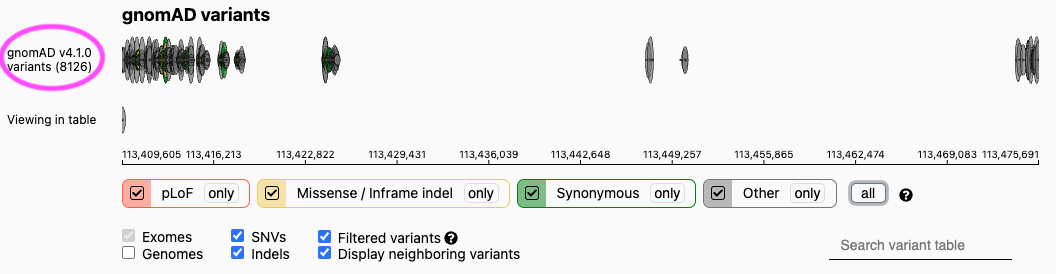

In [58]:
# Filter to interval, e.g. for DRD2.
gene_interval = "11:113409605-113475691"

gene_ht = filter_by_interval(ht, gene_interval)

# Filter the exome release Hail Table to the ASH1L gene interval.
print("The total number of variants in this gene interval is: ", gene_ht.count())

print(get_variant_count(gene_ht, singletons=True, doubletons=True))

The total number of variants in this gene interval is:  8126


{'number of singletons': 1390, 'number of doubletons': 384, 'number of variants with AF < 0.01': 2711, 'number of variants with AF < 0.001': 2662}


### On gene page

To get the number of variants shown on the gene page, if you click 'all' and check 'exomes', 'SNVs', 'Indels', and 'Filtered variants' as this: 

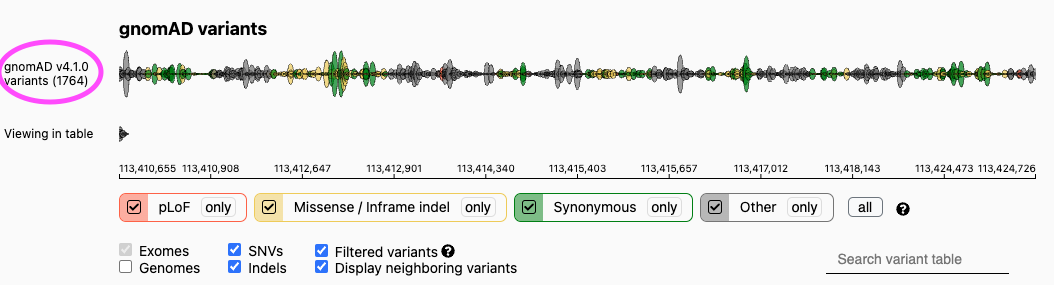

In [49]:
# gene_symbol can be upper or lower case
ht = get_ht_by_datatype_and_version(data_type='exomes', version='4.1')

drd2 = filter_by_gene_symbol(ht, 'drd2')
drd2.count()

1764

# Filter to variants by VEP annotations

You can get the variant table either by gene_symbol or gene interval, we recommen you to get by gene_symbol because it's already filtered to MANE Select transcript of a gene. 

In [57]:
# lof, missense, synonymous variants passing filters
variants_of_interest = filter_by_csqs(drd2,['lof','missense','synonymous'])
variants_of_interest.show(5)

+-----------------+------------+
| locus           | alleles    |
+-----------------+------------+
| locus<GRCh38>   | array<str> |
+-----------------+------------+
| chr11:113410731 | ["C","A"]  |
| chr11:113410731 | ["C","T"]  |
| chr11:113410735 | ["G","A"]  |
| chr11:113410736 | ["G","A"]  |
| chr11:113410736 | ["G","T"]  |
+-----------------+------------+

+------------------------------------------------------------------------------+
| freq                                                                         |
+------------------------------------------------------------------------------+
| array<struct{AC: int32, AF: float64, AN: int32, homozygote_count: int64}>    |
+------------------------------------------------------------------------------+
| [(2,1.37e-06,1461866,0),(2,1.37e-06,1461894,0),(0,0.00e+00,33480,0),(2,4.... |
| [(1,6.84e-07,1461866,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
| [(75,5.13e-05,1461876,0),(75,5.13e-05,1461894,0),(0,0.00e+00,33480,0),(0,... |
| [(15,1.03e-05,1461882,0),(15,1.03e-05,1461894,0),(0,0.00e+00,33480,0),(0,... |
| [(1,6.84e-07,1461882,0),(1,6.84e-07,1461894,0),(0,0.00e+00,33480,0),(0,0.... |
+------------------------------------------------------------------------------+

+------------------+------------------+------------------+
| grpmax.gnomad.AC | grpmax.gnomad.AF | grpmax.gnomad.AN |
+------------------+------------------+------------------+
|            int32 |          float64 |            int32 |
+------------------+------------------+------------------+
|                2 |         4.47e-05 |            44724 |
|                1 |         8.99e-07 |          1112010 |
|                8 |         7.19e-06 |          1112004 |
|               15 |         1.35e-05 |          1112010 |
|                1 |         8.99e-07 |          1112010 |
+------------------+------------------+------------------+

+--------------------------------+-----------------------+-------------------+
| grpmax.gnomad.homozygote_count | grpmax.gnomad.gen_anc | grpmax.non_ukb.AC |
+--------------------------------+-----------------------+-------------------+
|                          int64 | str                   |             int32 |
+--------------------------------+-----------------------+-------------------+
|                              0 | "amr"                 |                 2 |
|                              0 | "nfe"                 |                NA |
|                              0 | "nfe"                 |                 2 |
|                              0 | "nfe"                 |                 1 |
|                              0 | "nfe"                 |                NA |
+--------------------------------+-----------------------+-------------------+

+-------------------+-------------------+---------------------------------+
| grpmax.non_ukb.AF | grpmax.non_ukb.AN | grpmax.non_ukb.homozygote_count |
+-------------------+-------------------+---------------------------------+
|           float64 |             int32 |                           int64 |
+-------------------+-------------------+---------------------------------+
|          4.57e-05 |             43740 |                               0 |
|                NA |                NA |                              NA |
|          5.71e-06 |            350102 |                               0 |
|          2.86e-06 |            350106 |                               0 |
|                NA |                NA |                              NA |
+-------------------+-------------------+---------------------------------+

+------------------------+
| grpmax.non_ukb.gen_anc |
+------------------------+
| str                    |
+------------------------+
| "amr"                  |
| NA                     |
| "nfe"                  |
| "nfe"                  |
| NA                     |
+------------------------+

+------------------------------------------------------------------------------+
| faf   

In [50]:
# number of lof variants passing filters
filter_by_csqs(drd2,['lof']).count()

17

In [51]:
# number of missense variants passing filters
filter_by_csqs(drd2,['missense']).count()

409

In [52]:
# number of synonymous variants passing filters
filter_by_csqs(drd2,['synonymous']).count()

238

In [55]:
# number of 'Other' variants passing filters
filter_by_csqs(drd2,['other']).count()

783

## Filter to 'HC' LOF variants for certain genes

In [5]:
# Filter to variants in ASH1L that are LOFTEE high-confidence (with no flags) in the MANE select transcript.
ht = filter_vep_transcript_csqs(
    ht, 
    synonymous=False, 
    mane_select=True,
    genes=["ASH1L"],
    match_by_gene_symbol=True,
    additional_filtering_criteria=[lambda x: (x.lof == "HC") & hl.is_missing(x.lof_flags)],
)

INFO (gnomad.utils.vep 928): Filtering to canonical transcripts
INFO (gnomad.utils.vep 931): Filtering to MANE Select transcripts...
INFO (gnomad.utils.vep 934): Filtering to Ensembl transcripts...
INFO (gnomad.utils.vep 940): Filtering to genes of interest...
INFO (gnomad.utils.vep 948): Filtering to variants with additional criteria...


### Filter to pLOF variants that we used to compute constraint metrics
pLOF variants meets the following requirements:
* High-confidence LOFTEE variants (without any flags),
* Only variants in the MANE Select transcript,
* PASS variants that are SNVs with MAF ≤ 0.1%, and
* Exome median depth ≥ 30 (**This is changing in v4 constraint?**)

**Note: this number should match the number of observed pLOF SNVs on the gene page of gnomAD Browser.**

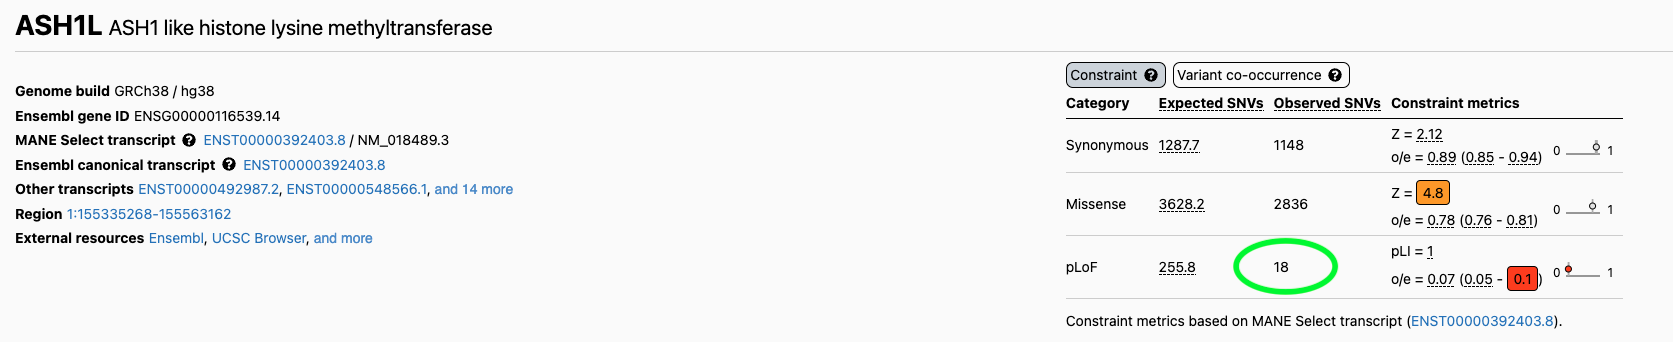

In [6]:
coverage_ht = coverage("exomes").ht()

#Filter to PASS SNVs with AF <= 0.1% and median exome depth ≥ 30.
ht = ht.filter(
    (hl.len(ht.filters) == 0) 
    & (ht.allele_info.allele_type == "snv")
    & (ht.freq[0].AF <= 0.001)
    & (coverage_ht[ht.locus].median_approx >= 30)
)


print(f"Number of variants: {ht.count()}")
ht.select(
    freq=ht.freq[0],
    csq=ht.vep.transcript_consequences[0].consequence_terms,
    coverage=coverage_ht[ht.locus],
).show(-1)

Number of variants: 18


+----------------+------------+---------+----------+---------+
| locus          | alleles    | freq.AC |  freq.AF | freq.AN |
+----------------+------------+---------+----------+---------+
| locus<GRCh38>  | array<str> |   int32 |  float64 |   int32 |
+----------------+------------+---------+----------+---------+
| chr1:155337668 | ["G","A"]  |     459 | 3.14e-04 | 1461270 |
| chr1:155337704 | ["G","A"]  |       6 | 4.10e-06 | 1461714 |
| chr1:155337735 | ["G","C"]  |       1 | 6.84e-07 | 1461694 |
| chr1:155338087 | ["A","T"]  |       1 | 6.85e-07 | 1459648 |
| chr1:155338161 | ["G","A"]  |       1 | 6.84e-07 | 1461884 |
| chr1:155349380 | ["T","A"]  |       1 | 6.84e-07 | 1461768 |
| chr1:155354631 | ["C","T"]  |       1 | 6.88e-07 | 1453416 |
| chr1:155357583 | ["A","T"]  |       1 | 6.84e-07 | 1461680 |
| chr1:155370984 | ["C","T"]  |       3 | 2.06e-06 | 1455726 |
| chr1:155415924 | ["C","A"]  |       2 | 1.48e-06 | 1352032 |
| chr1:155478020 | ["G","C"]  |       1 | 6.84e-07 | 1461888 |
| chr1:155478203 | ["C","T"]  |       1 | 6.84e-07 | 1461874 |
| chr1:155478439 | ["C","T"]  |       1 | 6.84e-07 | 1461890 |
| chr1:155478528 | ["G","A"]  |       1 | 6.84e-07 | 1461876 |
| chr1:155479767 | ["G","A"]  |       1 | 6.84e-07 | 1461858 |
| chr1:155479862 | ["G","T"]  |       1 | 6.84e-07 | 1461160 |
| chr1:155521291 | ["C","A"]  |       1 | 6.84e-07 | 1461862 |
| chr1:155521474 | ["C","A"]  |       1 | 6.84e-07 | 1461724 |
+----------------+------------+---------+----------+---------+

+-----------------------+-----------------------------+---------------+
| freq.homozygote_count | csq                         | coverage.mean |
+-----------------------+-----------------------------+---------------+
|                 int64 | array<str>                  |       float64 |
+-----------------------+-----------------------------+---------------+
|                     0 | ["stop_gained"]             |      2.99e+01 |
|                     0 | ["stop_gained"]             |      3.02e+01 |
|                     0 | ["stop_gained"]             |      3.00e+01 |
|                     0 | ["splice_donor_variant"]    |      3.16e+01 |
|                     0 | ["stop_gained"]             |      3.19e+01 |
|                     0 | ["stop_gained"]             |      3.21e+01 |
|                     0 | ["splice_acceptor_variant"] |      3.04e+01 |
|                     0 | ["splice_donor_variant"]    |      3.13e+01 |
|                     0 | ["splice_acceptor_variant"] |      3.12e+01 |
|                     0 | ["splice_acceptor_variant"] |      2.73e+01 |
|                     0 | ["stop_gained"]             |      3.26e+01 |
|                     0 | ["stop_gained"]             |      3.27e+01 |
|                     0 | ["stop_gained"]             |      3.28e+01 |
|                     0 | ["stop_gained"]             |      3.28e+01 |
|                     0 | ["stop_gained"]             |      3.30e+01 |
|                     0 | ["stop_gained"]             |      3.24e+01 |
|                     0 | ["stop_gained"]             |      3.30e+01 |
|                     0 | ["stop_gained"]             |      3.29e+01 |
+-----------------------+-----------------------------+---------------+

+------------------------+-------------------+-----------------+
| coverage.median_approx | coverage.total_DP | coverage.over_1 |
+------------------------+-------------------+-----------------+
|                  int32 |             int64 |         float64 |
+------------------------+-------------------+-----------------+
|                     30 |          21887528 |        1.00e+00 |
|                     30 |          22042372 |        1.00e+00 |
|                     30 |          21956914 |        1.00e+00 |
|                     31 |          23111319 |        1.00e+00 |
|                     31 |          23308434 |        1.00e+00 |
|                     32 |          23444999 |        1.00e+00 |
|                     31 |          2220971

# Get 'freq' for specific genetic ancestry groups

## Get 'freq' for multiple groups for an (gene) interval

In [60]:
ht = get_ht_by_datatype_and_version(data_type='exomes', version='4.1')

# Filter to interval, e.g. for ASH1L.
gene_interval = "chr1:155335268-155563162"

# Filter the exome release Hail Table to the ASH1L gene interval.
ht = hl.filter_intervals(ht, [hl.parse_locus_interval(gene_interval, reference_genome="GRCh38")])

# Filter to variants with adj.AC > 0 
ht = ht.filter(ht.freq[0].AC>0)

In [61]:
ht = extract_callstats_for_multiple_ancs(ht, gen_ancs=['afr', 'amr', 'eas', 'mid', 'nfe', 'sas'])

ht.show(5)

+----------------+------------+--------+---------+--------+
| locus          | alleles    | afr.AC |  afr.AF | afr.AN |
+----------------+------------+--------+---------+--------+
| locus<GRCh38>  | array<str> |  int32 | float64 |  int32 |
+----------------+------------+--------+---------+--------+
| chr1:155335497 | ["A","C"]  |      0 |      NA |      0 |
| chr1:155335570 | ["T","C"]  |      0 |      NA |      0 |
| chr1:155335571 | ["TA","T"] |      0 |      NA |      0 |
| chr1:155335746 | ["G","C"]  |      0 |      NA |      0 |
| chr1:155335855 | ["G","A"]  |      0 |      NA |      0 |
+----------------+------------+--------+---------+--------+

+----------------------+--------+---------+--------+----------------------+
| afr.homozygote_count | amr.AC |  amr.AF | amr.AN | amr.homozygote_count |
+----------------------+--------+---------+--------+----------------------+
|                int64 |  int32 | float64 |  int32 |                int64 |
+----------------------+--------+---------+--------+----------------------+
|                    0 |      0 |      NA |      0 |                    0 |
|                    0 |      0 |      NA |      0 |                    0 |
|                    0 |      0 |      NA |      0 |                    0 |
|                    0 |      0 |      NA |      0 |                    0 |
|                    0 |      0 |      NA |      0 |                    0 |
+----------------------+--------+---------+--------+----------------------+

+--------+----------+--------+----------------------+--------+---------+
| eas.AC |   eas.AF | eas.AN | eas.homozygote_count | mid.AC |  mid.AF |
+--------+----------+--------+----------------------+--------+---------+
|  int32 |  float64 |  int32 |                int64 |  int32 | float64 |
+--------+----------+--------+----------------------+--------+---------+
|      0 | 0.00e+00 |    138 |                    0 |      0 |      NA |
|      1 | 7.25e-03 |    138 |                    0 |      0 |      NA |
|      1 | 7.25e-03 |    138 |                    0 |      0 |      NA |
|      0 | 0.00e+00 |    132 |                    0 |      0 |      NA |
|      1 | 7.25e-03 |    138 |                    0 |      0 |      NA |
+--------+----------+--------+----------------------+--------+---------+

+--------+----------------------+--------+----------+--------+
| mid.AN | mid.homozygote_count | nfe.AC |   nfe.AF | nfe.AN |
+--------+----------------------+--------+----------+--------+
|  int32 |                int64 |  int32 |  float64 |  int32 |
+--------+----------------------+--------+----------+--------+
|      0 |                    0 |      0 | 0.00e+00 |      2 |
|      0 |                    0 |      0 | 0.00e+00 |      2 |
|      0 |                    0 |      0 | 0.00e+00 |      2 |
|      0 |                    0 |      0 | 0.00e+00 |      2 |
|      0 |                    0 |      0 | 0.00e+00 |      6 |
+--------+----------------------+--------+----------+--------+

+----------------------+--------+---------+--------+----------------------+
| nfe.homozygote_count | sas.AC |  sas.AF | sas.AN | sas.homozygote_count |
+----------------------+--------+---------+--------+----------------------+
|                int64 |  int32 | float64 |  int32 |                int64 |
+----------------------+--------+---------+--------+----------------------+
|                    0 |      0 |      NA |      0 |                    0 |
|                    0 |      0 |      NA |      0 |                    0 |
|                    0 |      0 |      NA |      0 |                    0 |
|                    0 |      0 |      NA |      0 |                    0 |
|                    0 |      0 |      NA |      0 |                    0 |
+----------------------+--------+---------+--------+----------------------+
showing top 5 rows

## Get 'freq' for a specific group and a specific variant

In [62]:
ht = get_ht_by_datatype_and_version(data_type='exomes', version='4.1')

# When a variant exists...
extract_callstats_for_1anc_1variant(ht, gen_anc='AFR', contig='chr22', position=15528692, alleles=['C','G']).show(-1)

+----------------+------------+--------+----------+--------+
| locus          | alleles    | afr.AC |   afr.AF | afr.AN |
+----------------+------------+--------+----------+--------+
| locus<GRCh38>  | array<str> |  int32 |  float64 |  int32 |
+----------------+------------+--------+----------+--------+
| chr22:15528692 | ["C","G"]  |    635 | 1.90e-02 |  33380 |
+----------------+------------+--------+----------+--------+

+----------------------+
| afr.homozygote_count |
+----------------------+
|                int64 |
+----------------------+
|                    6 |
+----------------------+

In [64]:
# When a variant doesn't exist...
extract_callstats_for_1anc_1variant(ht, gen_anc='AFR', contig='chr22', position=15528692, alleles=['C','A']).show(-1)

2024-11-02 02:02:23.969 Hail: WARN: No variant found at chr22:15528692 with alleles ['C', 'A']


+---------------+------------+--------+---------+--------+
| locus         | alleles    | afr.AC |  afr.AF | afr.AN |
+---------------+------------+--------+---------+--------+
| locus<GRCh38> | array<str> |  int32 | float64 |  int32 |
+---------------+------------+--------+---------+--------+
+---------------+------------+--------+---------+--------+

+----------------------+
| afr.homozygote_count |
+----------------------+
|                int64 |
+----------------------+
+----------------------+

In [67]:
notebook_name='toolbox_for_gnomad_users'

#Uncomment top lines for the first time exporting on a cluster
#!/opt/conda/default/bin/conda create -n save-html-env --clone /opt/conda/default
#!/opt/conda/miniconda3/envs/save-html-env/bin/pip install "nbconvert<6" jinja2==3.0.3 jupyter_contrib_nbextensions

# Download the notebook from Google Cloud Storage
!gsutil -u broad-mpg-gnomad cp gs://gnomad-qin/qin_notebooks/{notebook_name}.ipynb .

# Convert the notebook to HTML with embedded resources
! /opt/conda/miniconda3/envs/save-html-env/bin/jupyter nbconvert \
    --CodeFoldingPreprocessor.remove_folded_code=True --to html_embed \
    --template "/opt/conda/miniconda3/envs/save-html-env/lib/python3.11/site-packages/jupyter_contrib_nbextensions/templates/toc2.tpl" \
    {notebook_name}.ipynb

# Upload the converted HTML back to Google Cloud Storage
!gsutil -u broad-mpg-gnomad cp {notebook_name}.html gs://gnomad-qin/qin_notebooks/{notebook_name}.html

Copying gs://gnomad-qin/qin_notebooks/toolbox_for_gnomad_users.ipynb...
/ [1 files][747.1 KiB/747.1 KiB]                                                
Operation completed over 1 objects/747.1 KiB.                                    
[NbConvertApp] WARNING | Config option `extra_template_paths` not recognized by `EmbedHTMLExporter`.  Did you mean `template_path`?
[NbConvertApp] Converting notebook toolbox_for_gnomad_users.ipynb to html_embed
[NbConvertApp] Writing 943138 bytes to toolbox_for_gnomad_users.html
Copying file://toolbox_for_gnomad_users.html [Content-Type=text/html]...
/ [1 files][921.1 KiB/921.1 KiB]                                                
Operation completed over 1 objects/921.1 KiB.                                    
